<a href="https://colab.research.google.com/github/THABOR7677/Machine-Learning-Projects/blob/Project-3-House-Price-Prediction/Project3_ML_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Importing the Dependencies**


In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 import sklearn.datasets
 from sklearn.datasets import fetch_california_housing
 from sklearn.model_selection import train_test_split
 from xgboost import XGBRegressor
 from sklearn import metrics

**Importing the Boston House Price Dataset**

In [2]:
House_Price_Dataset = fetch_california_housing()

In [3]:
print(House_Price_Dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
# Fetching the dataset again to get the original Bunch object
House_Price_Dataset = fetch_california_housing()

In [5]:
# Creaing the DataFrame using the data and feature names from the Bunch object
House_Price_Dataframe = pd.DataFrame(House_Price_Dataset.data, columns=House_Price_Dataset.feature_names)

In [6]:
# Print first 5 rows of our Dataframe
House_Price_Dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
# add the target (Price) column to the DataFrame
House_Price_Dataframe['price'] = House_Price_Dataset.target

In [17]:
House_Price_Dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
#Checking the number of rows and columns in the dataset
House_Price_Dataframe.shape

(20640, 9)

In [19]:
#Checking for missing values
House_Price_Dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [20]:
#statistical measures of the dataset
House_Price_Dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Understanding the correlation between various features in the dataset**

1. Positive Corralation
2. Negative Correlation

In [21]:
correlation = House_Price_Dataframe.corr()

<Axes: >

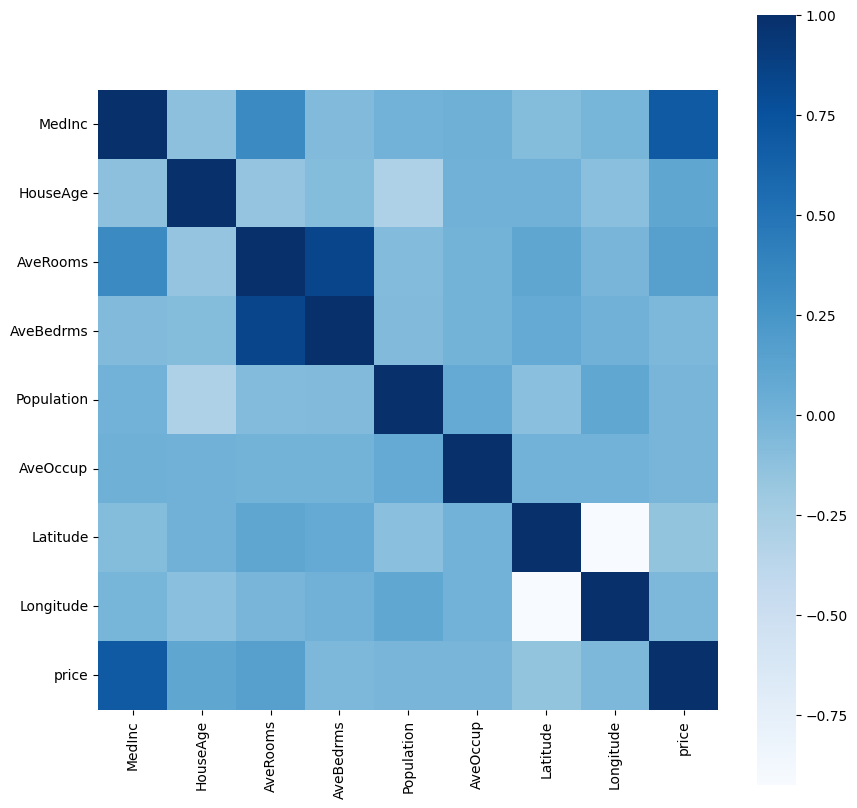

In [22]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot_kws={'size':10}, cmap='Blues')

**Splitting the Data and Target**

In [24]:
x = House_Price_Dataframe.drop(['price'], axis=1)
y = House_Price_Dataframe['price']

In [25]:
print(x)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

**Splitting Data into training and Testing Data**

In [26]:
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [27]:
print(x.shape, x_train.shape, x_test.shape)

(20640, 8) (16512, 8) (16512,)


**Training the Model**

**XGBoost Regressor**

In [28]:
# Including the model
model = XGBRegressor()

In [29]:
#Training the model with x_train
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluation**

**Prediction on the Training data**

In [30]:
# accuracy for the Prediction on the Training Data
Training_data_prediction = model.predict(x_train)

In [34]:
print(Training_data_prediction)

[[ 286.27362      5.521048 ]
 [ 237.04355    -12.5181465]
 [1247.693       -1.7437637]
 ...
 [ 470.03445    -27.480295 ]
 [ 652.4819      -6.854977 ]
 [  81.69676    -67.23198  ]]


In [33]:
# R square error
score_1 = metrics.r2_score(y_train, Training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, Training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

ValueError: Found input variables with inconsistent numbers of samples: [4128, 16512]

**Visualizing the actual Prices and Predicted Prices**

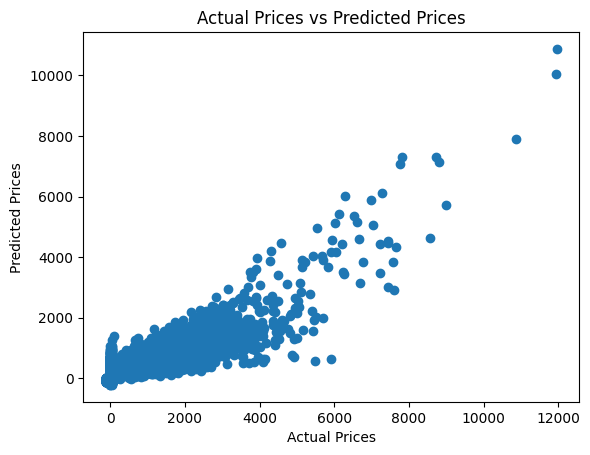

In [36]:
plt.scatter(y_train, Training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

**Prediction on Test Data**

In [38]:
# accuracy for the Prediction on the test Data
Test_data_prediction = model.predict(x_test)


ValueError: feature_names mismatch: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] ['price']
expected MedInc, Latitude, Population, Longitude, AveRooms, AveOccup, HouseAge, AveBedrms in input data
training data did not have the following fields: price

In [ ]:
# R square error
score_1 = metrics.r2_score(y_test, Test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, Test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)